# Grouping by
### Importing the library and csv files

In [52]:
import pandas as pd

In [53]:
df = pd.read_csv("Excel and CSV Files/General Weather Data.csv", sep = None, engine = "python")
df

,﻿day,city,temperature,windspeed,event
0,1.01.2021,new york,32,6,Rain
1,2.01.2021,new york,36,7,Sunny
2,3.01.2021,new york,28,12,Snow
3,4.01.2021,new york,33,7,Sunny
4,1.01.2021,ankara,90,5,Sunny
5,2.01.2021,ankara,85,12,Fog
6,3.01.2021,ankara,87,15,Fog
7,4.01.2021,ankara,92,5,Rain
8,1.01.2021,hong kong,45,20,Sunny
9,2.01.2021,hong kong,50,13,Cloudy


This `.groupby` function groups the data according to the given paramter.
<br>In this case there are three cities therefore there are three grups

In [54]:
g = df.groupby('city')
g

### As we can see below:

In [55]:
for city,city_df in g:
    print(city)
    print(city_df)

ankara
        ﻿day    city  temperature  windspeed  event
4  1.01.2021  ankara           90          5  Sunny
5  2.01.2021  ankara           85         12    Fog
6  3.01.2021  ankara           87         15    Fog
7  4.01.2021  ankara           92          5   Rain
hong kong
         ﻿day       city  temperature  windspeed   event
8   1.01.2021  hong kong           45         20   Sunny
9   2.01.2021  hong kong           50         13  Cloudy
10  3.01.2021  hong kong           54          8  Cloudy
11  4.01.2021  hong kong           42         10  Cloudy
new york
        ﻿day      city  temperature  windspeed  event
0  1.01.2021  new york           32          6   Rain
1  2.01.2021  new york           36          7  Sunny
2  3.01.2021  new york           28         12   Snow
3  4.01.2021  new york           33          7  Sunny


This function is really similiar to following SQL code:
<br>`SELECT * from city_data GROUP BY City`

In [56]:
g.max() #illustrates the max value on the groups

,﻿day,temperature,windspeed,event
city,,,,
ankara,4.01.2021,92,15,Sunny
hong kong,4.01.2021,54,20,Sunny
new york,4.01.2021,36,12,Sunny


In [57]:
g.mean() # Indicates the average value on the categories

,temperature,windspeed
city,,
ankara,88.50,9.25
hong kong,47.75,12.75
new york,32.25,8.00


In [58]:
g.describe() # Shwos all of the information

temperature                                                   \
                count   mean       std   min    25%   50%    75%   max   
city                                                                     
ankara            4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
hong kong         4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   
new york          4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   

          windspeed                                                 
              count   mean       std  min   25%   50%    75%   max  
city                                                                
ankara          4.0   9.25  5.057997  5.0  5.00   8.5  12.75  15.0  
hong kong       4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0  
new york        4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0

city
ankara       AxesSubplot(0.125,0.125;0.775x0.755)
hong kong    AxesSubplot(0.125,0.125;0.775x0.755)
new york     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

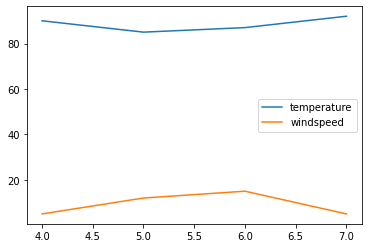

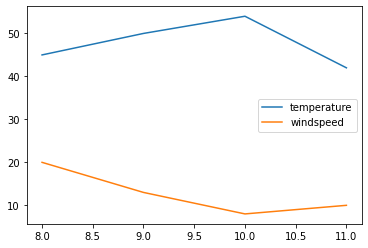

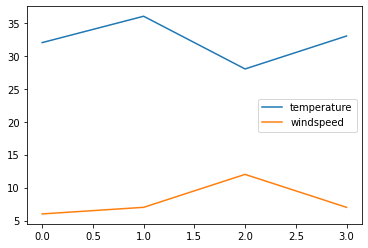

In [59]:
%matplotlib inline
g.plot()

### For more information:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

***
# Concatenating
### We have two seperate dataframes:

In [60]:
turkey_weather = pd.DataFrame({
    "city": ["ankara", "istanbul","izmir"],
    "temperature" : [32, 45, 30],
    "humidty" : [15, 55, 65]
})
turkey_weather

,city,temperature,humidty
0,ankara,32,15
1,istanbul,45,55
2,izmir,30,65


In [61]:
usa_weather = pd.DataFrame({
    "city": ["New York", "Florida","Washington"],
    "temperature" : [25, 50, 30],
    "humidty" : [25, 65, 15]
})
usa_weather

,city,temperature,humidty
0,New York,25,25
1,Florida,50,65
2,Washington,30,15


Pandas provide `pd.concate` function that joints the seperated dataframes:

In [62]:
dataframe = pd.concat([turkey_weather,usa_weather], ignore_index = True)
dataframe

,city,temperature,humidty
0,ankara,32,15
1,istanbul,45,55
2,izmir,30,65
3,New York,25,25
4,Florida,50,65
5,Washington,30,15


For more information: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

Keys argument will categorize the dataframes pursuant to the given words.

In [63]:
dataframe = pd.concat([turkey_weather,usa_weather], keys = ["Turkey","Usa"])
dataframe

city  temperature  humidty
Turkey 0      ankara           32       15
       1    istanbul           45       55
       2       izmir           30       65
Usa    0    New York           25       25
       1     Florida           50       65
       2  Washington           30       15

In [64]:
dataframe.loc["Turkey"]

,city,temperature,humidty
0,ankara,32,15
1,istanbul,45,55
2,izmir,30,65


In the cases of appending the second or more dataframes as a column such as given below:

In [65]:
temperature_df = pd.DataFrame({
    "city": ["New York", "Florida","Washington"],
    "temperature" : [25, 50, 30]
}, index = [0, 1, 2])
temperature_df

,city,temperature
0,New York,25
1,Florida,50
2,Washington,30


In [66]:
windspeed_df = pd.DataFrame({
    "city": ["Washington", "New York","Florida"],
    "windspeed" : [7, 12, 9]
}, index = [2, 0, 1])
windspeed_df

,city,windspeed
2,Washington,7
0,New York,12
1,Florida,9


As we can see concat is not really working

In [67]:
df = pd.concat([temperature_df,windspeed_df])
df

,city,temperature,windspeed
0,New York,25.0,NaN
1,Florida,50.0,NaN
2,Washington,30.0,NaN
2,Washington,NaN,7.0
0,New York,NaN,12.0
1,Florida,NaN,9.0


We can change the `axis` argument.
<br>And we can always give the dataframes the index parameter to protect ourselves from placing the wrong row going to the wrong place.

In [68]:
df = pd.concat([temperature_df,windspeed_df], axis = 1)
df

,city,temperature,city,windspeed
0,New York,25,New York,12
1,Florida,50,Florida,9
2,Washington,30,Washington,7


### we can also joint dataframes with series() function

In [72]:
s = pd.Series(["Rain", "Dry", "Humid"], name = "event", index = [2, 1, 0])
s

2     Rain
1      Dry
0    Humid
Name: event, dtype: object

In [73]:
pd.concat([temperature_df,s], axis = 1)

,city,temperature,event
0,New York,25,Humid
1,Florida,50,Dry
2,Washington,30,Rain


***
# A Better Way to Joint Dataframes: `merge()`

In [84]:
temperature_df = pd.DataFrame({
    "city": ["New York", "Florida","Washington", "Chicago", "Mexico"],
    "temperature" : [25, 50, 30, 12, 4]
}, index = [0, 1, 2, 3, 4])
temperature_df

,city,temperature
0,New York,25
1,Florida,50
2,Washington,30
3,Chicago,12
4,Mexico,4


In [85]:
humidity_df = pd.DataFrame({
    "city": ["Florida", "Washington","New York"],
    "humidty" : [65, 15, 25]
}, index = [1, 2, 0])
humidity_df

,city,humidty
1,Florida,65
2,Washington,15
0,New York,25


In [87]:
mergedDF = pd.merge(temperature_df, humidity_df, on = "city", how = "outer", indicator = True)
mergedDF

,city,temperature,humidty,_merge
0,New York,25,25.0,both
1,Florida,50,65.0,both
2,Washington,30,15.0,both
3,Chicago,12,NaN,left_only
4,Mexico,4,NaN,left_only


### If the members are not in the same number, function will take the common elements in dataframes.
We can add the 'how' argument to the merge function. This argument will deduce how the joint will be made.
<br>if we say "outer" all of the elements will be included. "Inner" is default so it will only take the ones in the intersection.
<br>"left" will take the intersection and left ones.
<br>For more information: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

Indicator will show which elements origins from.